In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
%matplotlib inline 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['top2018.csv']


In [2]:
df = pd.read_csv('../input/top2018.csv')

In [3]:
df.tail()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
95,630sXRhIcfwr2e4RdNtjK,Rewrite The Stars,Zac Efron,0.684,0.619,10.0,-7.005,1.0,0.0386,0.0716,0.000000,0.1220,0.2840,125.046,217440.0,4.0
96,2xmrfQpmS2iJExTlklLoA,I Miss You (feat. Julia Michaels),Clean Bandit,0.638,0.658,3.0,-6.318,1.0,0.0456,0.2450,0.000004,0.0919,0.3300,105.076,205748.0,4.0
97,5WvAo7DNuPRmk4APhdPzi,No Brainer,DJ Khaled,0.552,0.760,0.0,-4.706,1.0,0.3420,0.0733,0.000000,0.0865,0.6390,135.702,260000.0,5.0
98,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,11.0,-6.593,0.0,0.0390,0.1010,0.000001,0.1060,0.0967,180.043,239000.0,4.0
99,3EPXxR3ImUwfayaurPi3c,Be Alright,Dean Lewis,0.553,0.586,11.0,-6.319,1.0,0.0362,0.6970,0.000000,0.0813,0.4430,126.684,196373.0,4.0


# Data Cleaning

In [4]:
df.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [5]:
df['Duration_min']=df['duration_ms']/60000
df.drop(columns='duration_ms',inplace=True)

In [6]:
# added a popularity column.
df['popularity'] = df.index + 1
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Duration_min,popularity
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,4.0,3.316217,1
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,4.0,2.776767,2
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,4.0,3.635783,3
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,4.0,3.690667,4
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,4.0,3.632083,5


# Data Analysis/Visualization

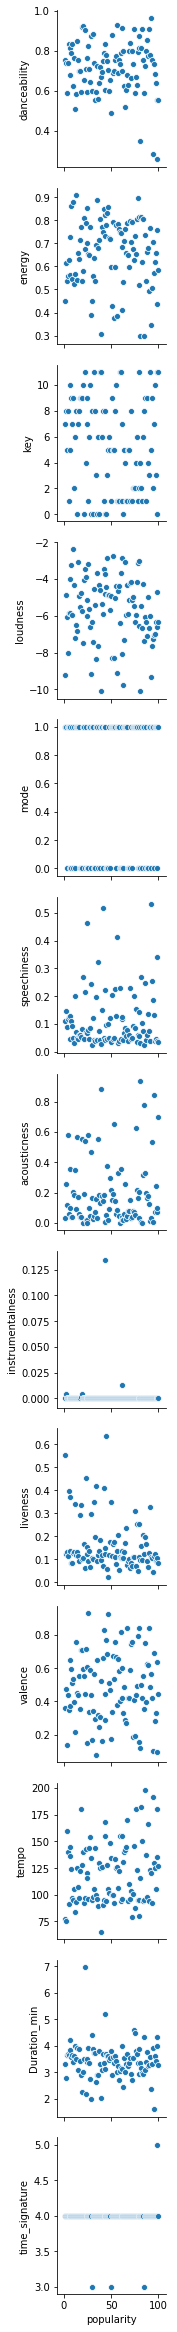

In [7]:
sns.pairplot(df, x_vars='popularity' , y_vars=['danceability', 'energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','Duration_min','time_signature']);

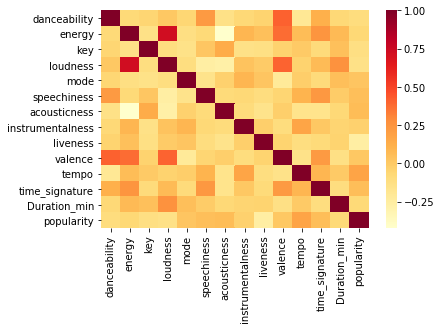

In [8]:
sns.heatmap(df.corr(),cmap="YlOrRd")

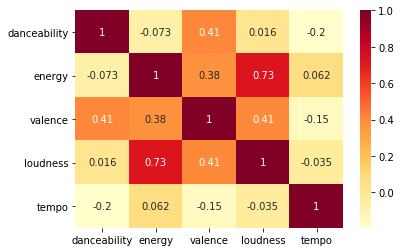

In [9]:
Correlation=df[['danceability','energy','valence','loudness','tempo']]
sns.heatmap(Correlation.corr(),annot=True,cmap="YlOrRd")

In [10]:
df['artists'].value_counts().head(10)

XXXTENTACION       6
Post Malone        6
Drake              4
Marshmello         3
Ed Sheeran         3
Selena Gomez       2
The Weeknd         2
Calvin Harris      2
Imagine Dragons    2
Camila Cabello     2
Name: artists, dtype: int64

## ML Time

In [11]:
df['TF']=df['popularity']<=12 #top 50
df.columns


Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'Duration_min', 'popularity',
       'TF'],
      dtype='object')

In [12]:
top50 = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'Duration_min', 'popularity',
       'TF']]
top50.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Duration_min,popularity,TF
0,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,4.0,3.316217,1,True
1,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,4.0,2.776767,2,True
2,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,4.0,3.635783,3,True
3,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,4.0,3.690667,4,True
4,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,4.0,3.632083,5,True


In [13]:
top50.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Duration_min,popularity,TF
95,0.684,0.619,10.0,-7.005,1.0,0.0386,0.0716,0.000000,0.1220,0.2840,125.046,4.0,3.624000,96,False
96,0.638,0.658,3.0,-6.318,1.0,0.0456,0.2450,0.000004,0.0919,0.3300,105.076,4.0,3.429133,97,False
97,0.552,0.760,0.0,-4.706,1.0,0.3420,0.0733,0.000000,0.0865,0.6390,135.702,5.0,4.333333,98,False
98,0.258,0.437,11.0,-6.593,0.0,0.0390,0.1010,0.000001,0.1060,0.0967,180.043,4.0,3.983333,99,False
99,0.553,0.586,11.0,-6.319,1.0,0.0362,0.6970,0.000000,0.0813,0.4430,126.684,4.0,3.272883,100,False


In [14]:
y = top50[['TF']]
x = top50[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'Duration_min']]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((90, 13), (10, 13), (90, 1), (10, 1))

In [17]:
from sklearn.ensemble import RandomForestClassifier as rf
clf = rf(n_estimators=100, max_depth=2,random_state=0)
clf.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
d = list(top50.columns)
xx = list(clf.feature_importances_)
for i in range(13):
    print(d[i], xx[i], sep=' :: ')


danceability :: 0.050186315693982804
energy :: 0.153209311120033
key :: 0.03517166315877335
loudness :: 0.11921159581164799
mode :: 0.007700384489438387
speechiness :: 0.08824804551680185
acousticness :: 0.049041433589351875
instrumentalness :: 0.02708178256222728
liveness :: 0.17993815487575415
valence :: 0.03227921925071575
tempo :: 0.12151057840910381
time_signature :: 0.0
Duration_min :: 0.13642151552216975


In [19]:
clf.score(x_train, y_train)

0.8888888888888888

In [20]:
clf.score(x_test, y_test)

0.8

## *Limitations*
We don't have data for songs that were not in top 100 out of over 35 million on Spotify. Therefore, this is merely a simple analysis of what characteristics make up the top 100. We may test against it,but we can't say that a song has potential to be in top 100 with our model without inlcuding much more data entries. There are external factors to a song's popularity such as adverstisements and more.
#### #OvErFiTTEd